# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


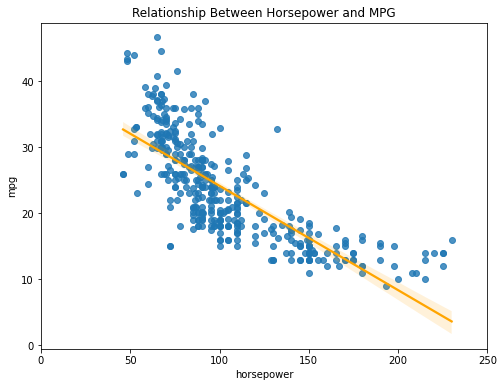

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
call_on_students(1)

['Ramses']


#### Answer: 

- lowest error is minimum, slope of -.158
- loss or cost function


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
call_on_students(1)

['Ben']


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
call_on_students(1)

['Lydia']


#### Answer: 

- steps move inverse to slope
- steps get smaller closer you get to 0 (gradient)
- directly proportional to the size of the gradient
- too small of step (take forever), too large (might not find minimum)
- learning_rate = the proportion of the gradient that we use to take our step


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
call_on_students(1)

['Nick']


#### Answer: 

- Categorical (classification), multi-class or binary
- Number 2
    - Technical Answer: ln(y / 1-y) = log-odds of target value   
    - Less Technical(.predict_proba): returns probabilities of being each class   
    - Less Technical 2(.predict): class prediction based threshold of .5
- Categorical vs. continuous target, linear predicts a numeric continuous value
- Parametric, optimizing for the best parameters (are the coefficients, otherwise known as model weights)

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [11]:
call_on_students(1)

['Bobbt D']


#### Answer: 

- can predict classes unlike linear regression (but still linear)
- less prone to noise then decision tree (means it less prone to overfitting)
- need to scale/normalize for logistic but not for decision trees
- logistic will probably work better out the gate (untuned) on class imbalance then decision tree
- logistic regression more sensitive to outliers then decision tree

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [12]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [13]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [14]:
call_on_students(1)

['JF']


In [15]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Scale the data
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [17]:
call_on_students(1)

['Sam']


#### Part 1: explore the target column breakdown in train data

In [20]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- class imbalance for target, 74% in class 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Dummy model always predict class 0 (strategy = 'most_frequent')
- Accuracy would be 74% on training data


#### Part 3: How accurate would that baseline be on test data?


In [22]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- 75% accurate on test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [23]:
call_on_students(1)

['Paul']


#### Answer:

- We should think about using an alternative metric (recall or precision, or f1)
- Use some form of resampling, oversampling (SMOTE) or undersampling, in this case not enough data to undersample
- class_weight hyperparamter (set to 'balanced' or manually assign weights)


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [24]:
call_on_students(1)

['Bobby G']


In [25]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

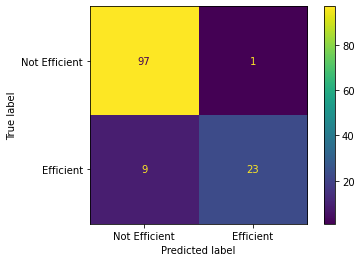

In [28]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_sc, y_test, display_labels=['Not Efficient', 'Efficient']);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [30]:
call_on_students(1)

['Em']


In [31]:
# Accuracy
y_test_pred = logreg.predict(X_test_sc)
accuracy_score(y_test, y_test_pred)

0.9230769230769231

In [41]:
# Precision
precision = precision_score(y_test, y_test_pred)
precision

0.9583333333333334

In [55]:
recall_score(y_train, logreg.predict(X_train_sc))

0.8955223880597015

In [43]:
# Recall
recall = recall_score(y_test, y_test_pred)
recall

0.71875

In [34]:
# F1-Score
f1_score(y_test, y_test_pred)

0.8214285714285714

In [37]:
2 * precision * recall / (precision + recall)

0.8214285714285714

In [38]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [44]:
call_on_students(1)

['Mike']


In [50]:
probas = logreg.predict_proba(X_test_sc)[:, 1]
probas

array([2.88211554e-03, 4.66577929e-03, 1.39110635e-04, 2.30040460e-03,
       3.65481656e-04, 9.56382448e-04, 9.97200959e-01, 9.73103080e-04,
       6.66636668e-02, 5.35778541e-04, 9.91065029e-01, 4.28371664e-02,
       8.45390051e-01, 1.36124411e-03, 8.81698888e-02, 3.13933548e-04,
       6.03042137e-02, 2.65313401e-04, 5.78978925e-04, 5.24607746e-04,
       1.25332049e-01, 7.61806157e-05, 8.57600530e-05, 8.67061834e-01,
       6.10344912e-04, 3.70596692e-03, 3.16963718e-02, 3.55067473e-01,
       7.97034531e-04, 8.03000867e-03, 9.47397282e-01, 2.14512246e-02,
       2.14283145e-01, 5.59151712e-04, 9.81588597e-01, 6.04199292e-05,
       9.65393863e-01, 2.39633260e-03, 9.66323397e-01, 9.99312202e-01,
       9.25243170e-01, 1.12718485e-03, 5.35187366e-05, 1.74465054e-03,
       9.67079081e-01, 9.98817896e-01, 2.81251779e-01, 1.54823217e-04,
       3.73172409e-03, 3.01269772e-04, 9.81312227e-01, 9.71495990e-03,
       7.19653335e-03, 1.70555661e-04, 4.01109500e-03, 3.35217499e-01,
      

In [51]:
# Calculate roc-auc
roc_auc_score(y_test, probas)

0.9811862244897959

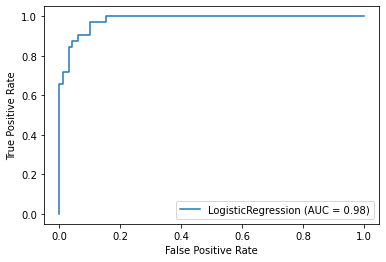

In [53]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_sc, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [54]:
call_on_students(1)

['JF']


#### Answer:

- model is looking pretty good, mostly high scores for test data (unseen data). 
- recall score is a bit low indicting more false negatives than potentially desired


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [56]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

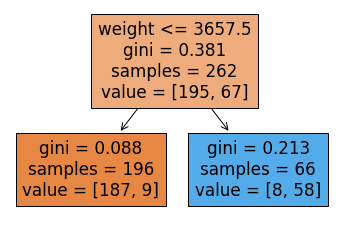

In [57]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

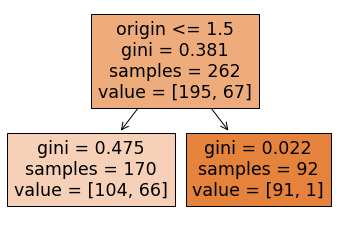

In [58]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [59]:
call_on_students(1)

['Ramses']


#### Answer:

- 'The most pure split'
- First one (weight)
- Data is partition (seperated) better in first one
- Gini score (impurity) lower for first one

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [61]:
call_on_students(1)

['Nick']


In [62]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
dt_unsc = DecisionTreeClassifier(random_state=42)
dt_unsc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

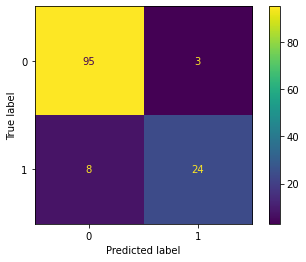

In [65]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_sc, y_test);

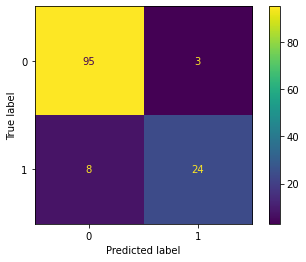

In [67]:
plot_confusion_matrix(dt_unsc, X_test, y_test);

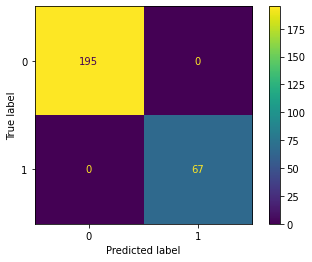

In [76]:
plot_confusion_matrix(dt_unsc, X_train, y_train);

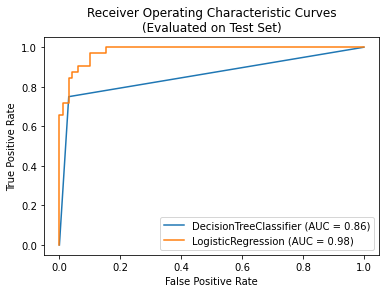

In [77]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt_unsc, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

In [68]:
from sklearn.preprocessing import Normalizer

In [69]:
normal = Normalizer()
normal.fit(X_train)
X_train_norm = normal.transform(X_train)
X_test_norm = normal.transform(X_test)

In [70]:
dt_norm = DecisionTreeClassifier(random_state=42)
dt_norm.fit(X_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

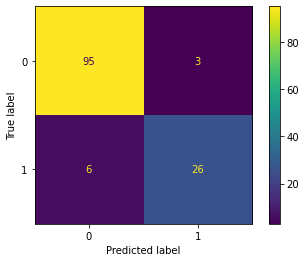

In [71]:
plot_confusion_matrix(dt_norm, X_test_norm, y_test);

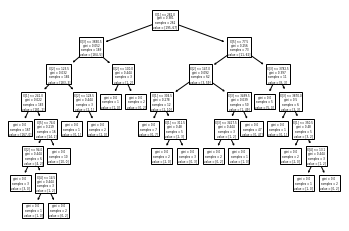

In [79]:
plot_tree(dt_unsc);

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [73]:
call_on_students(1)

['Paul']


#### Answer:

- Logistic regression is currently doing better, high AUC score, but the decision is very overfit, tuning it might help to improve
